
# Práctica 3: Detección de malware

## Objetivo

En la Universidad Francisco de Vitoria se quieren trazas de comunicación de la red para encontrar distintos malwares. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un plano que divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus características.

Para ello usaremos el dataset “Malware”. Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

Para empezar debemos importar las librerías necesarias y guardar el set de datos en una variable:

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
import random
import matplotlib.pyplot as plt

Al tratarse de un zip con varias carpetas, vamos a acceder a él y establecer los datos con sus respectivas etiquetas, pero vamos a ordenarlos de forma aleatoria para que el modelo trabaje mejor.

In [ ]:
!unzip Malware.zip

data = []
labels = []

malware_folders = ["Agent.FYI", "Fakerean", "Lolyda.AA1", "Yuner.A"]

for folder in malware_folders:
    folder_path = os.path.join("Malware", folder)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = imread(image_path)
        image_resized = resize(image, (64, 64))
        data.append(image_resized.flatten())
        labels.append(folder)

# Mezclar aleatoriamente los datos y las etiquetas
combined = list(zip(data, labels))
random.shuffle(combined)
data[:], labels[:] = zip(*combined)

Archive:  Malware.zip
   creating: Malware/
   creating: Malware/Agent.FYI/
 extracting: Malware/Agent.FYI/0002c75d65724084ec4e30695248f44b.png  
 extracting: Malware/Agent.FYI/0003ae2d9a0236947a5f1bf87b9ecbac.png  
 extracting: Malware/Agent.FYI/000a1342fec96ebc38965897331dbcdb.png  
 extracting: Malware/Agent.FYI/001c3641fcc9e6b9351f7b4c146544c4.png  
 extracting: Malware/Agent.FYI/002bb62e80912094ff9835005d904ce1.png  
 extracting: Malware/Agent.FYI/003b6c6452b02e5575c101557032f8b8.png  
 extracting: Malware/Agent.FYI/003bded45dab5ee1d20452b8be13af5f.png  
 extracting: Malware/Agent.FYI/0045a824dc491a2569fd1564140522c6.png  
 extracting: Malware/Agent.FYI/004a05b0bada6203e6db3a9ee1215fca.png  
 extracting: Malware/Agent.FYI/004dddc6ee18a44a5f67e8bbd6a54205.png  
 extracting: Malware/Agent.FYI/0050d50c12a61ba4d96af715e43cc063.png  
 extracting: Malware/Agent.FYI/005cd476ceb174041dd5b08b5fc9decb.png  
 extracting: Malware/Agent.FYI/0061dbcfbdcf90168b72677b1508e02a.png  
 extracting: M

El Support Vector Machine es un algoritmo de clasificación cuyo objetivo es buscar un hiperplano que separe un conjunto de datos en distintas clases.

Al contar con un dataset que cuenta con 465 imágenes, emplearemos este algoritmo para buscar un plano que divida las diferentes clases dispuestas en un espacio n-dimensional dependiendo de sus características.

In [ ]:
X = np.array(data)
y = np.array(labels)

Una vez que tenemos los datos, debemos dividirlos en datos de entrenamiento y de test, para ello los dividiremos un 70-30, sin embargo, dejaremos 10 imágenes con sus respectivas etiquetas para clasificarlas posteriormente.

In [ ]:
X_train = X[0:318, :]
X_test = X[319:454, :]

y_train = y[0:318]
y_test = y[319:454]

A continuación, empleamos el algoritmo SVM. Vamos a probar 3 configuraciones distintas, empezaremos por `gamma = 0.01`:

In [ ]:
clasi = SVC(gamma = 0.01)

# Entrena el modelo creado con el clasificador
clasi.fit(X_train, y_train)

# Predecimos el valor de las imágenes de test con el modelo entrenado
vp = clasi.predict(X_test)

# Empleamos la función metrics.classification_report() para generar un informe
# de clasificación que muestra diversas métricas de evaluación del modelo.
print(f"{metrics.classification_report(y_test, vp)}\n")

error = 1 - accuracy_score(y_test, vp)

print('El error de este modelo es de: %6.4f' % error)

              precision    recall  f1-score   support

   Agent.FYI       1.00      1.00      1.00        15
    Fakerean       1.00      1.00      1.00        10
  Lolyda.AA1       1.00      1.00      1.00        59
     Yuner.A       1.00      1.00      1.00        51

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135


El error de este modelo es de: 0.0000


Aunque hemos comenzado con un modelo que nos ofrece un error del 0%, vamos a probar con otras configuraciones a ver si empeora o sigue igual.

A continuación probaremos con un `gamma = 0.1`.

In [ ]:
clasi2 = SVC(gamma = 0.1)

# Entrena el modelo creado con el clasificador
clasi2.fit(X_train, y_train)

# Predecimos el valor de las imágenes de test con el modelo entrenado
vp2 = clasi2.predict(X_test)

# Empleamos la función metrics.classification_report() para generar un informe
# de clasificación que muestra diversas métricas de evaluación del modelo.
print(f"{metrics.classification_report(y_test, vp2)}\n")

error2 = 1 - accuracy_score(y_test, vp2)

print('El error de este modelo es de: %6.4f' % error2)

              precision    recall  f1-score   support

   Agent.FYI       0.63      1.00      0.77        17
    Fakerean       1.00      0.88      0.93        16
  Lolyda.AA1       1.00      0.83      0.91        48
     Yuner.A       1.00      1.00      1.00        54

    accuracy                           0.93       135
   macro avg       0.91      0.93      0.90       135
weighted avg       0.95      0.93      0.93       135


El error de este modelo es de: 0.0741


Como podemos observar, este modelo empeora con respecto al primero. En este caso, aumentando gamma obtenemos un error del 7.41%, por lo que nos quedaremos, de momento, con el modelo 1.

Finalmente, vamos a probar con un gamma más pequeño que los de los anteriores modelos. Vamos a ver qué ocurre cuando `gamma = 0.001`.

In [ ]:
clasi3 = SVC(gamma = 0.001)

# Entrena el modelo creado con el clasificador
clasi3.fit(X_train, y_train)

# Predecimos el valor de las imágenes de test con el modelo entrenado
vp3 = clasi3.predict(X_test)

# Empleamos la función metrics.classification_report() para generar un informe
# de clasificación que muestra diversas métricas de evaluación del modelo.
print(f"{metrics.classification_report(y_test, vp3)}\n")

error3 = 1 - accuracy_score(y_test, vp3)

print('El error de este modelo es de: %6.4f' % error3)

              precision    recall  f1-score   support

   Agent.FYI       1.00      1.00      1.00        17
    Fakerean       0.76      1.00      0.86        16
  Lolyda.AA1       1.00      0.90      0.95        48
     Yuner.A       1.00      1.00      1.00        54

    accuracy                           0.96       135
   macro avg       0.94      0.97      0.95       135
weighted avg       0.97      0.96      0.96       135


El error de este modelo es de: 0.0370


Observamos que en el modelo 3 también obtenemos un error mayor que si gamma era 0.01, pero menor que si gamma es 0.1 (3.7%). Por lo tanto, concluimos en que el mejor modelo es el primero con un error del 0%.

Sin embargo, **¿cómo funcionaría si no usamos kernels?**

Si utilizamos un algoritmo SVM sin kernels, optamos por un kernel lineal. En este caso, el SVM funciona encontrando el hiperplano que mejor separa las clases en el espacio de características. La función de decisión en este caso es simplemente un producto punto entre el vector de características de entrada y el vector de pesos, más un término de sesgo.

In [ ]:
# Crear y entrenar el modelo SVM lineal
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predecir las etiquetas de las imágenes de prueba
y_pred = svm_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**¿Y al usar distintos kernels?**


Al utilizar distintos kernels en SVM, permitimos que el modelo pueda aprender relaciones no lineales entre las características de entrada y las etiquetas de salida.



*   Kernel RBF (Radial Basis Function): Este es el kernel más comúnmente utilizado. Permite la clasificación no lineal al mapear los datos en un espacio de características de dimensión infinita utilizando una función de base radial. La función de similitud RBF es una medida de la distancia entre dos puntos en el espacio de características transformado.



In [ ]:
# Crear y entrenar el modelo SVM con kernel RBF
svm_rbf_model = SVC(kernel='rbf')
svm_rbf_model.fit(X_train, y_train)

y_pred2 = svm_rbf_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 1.0




*   Kernel Polinómico: Este kernel utiliza funciones polinomiales para realizar la transformación no lineal de los datos en un espacio de características de mayor dimensión. El grado del polinomio se especifica como un parámetro.



In [ ]:
# Crear y entrenar el modelo SVM con kernel polinómico de grado 3
svm_poly_model = SVC(kernel='poly', degree=3)
svm_poly_model.fit(X_train, y_train)

y_pred3 = svm_poly_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 1.0




*   Kernel Sigmoide: Este kernel utiliza una función sigmoide para realizar la transformación no lineal de los datos en un espacio de características. Puede ser útil en problemas donde se espera que los datos tengan un comportamiento similar al de la clasificación binaria.




In [ ]:
# Crear y entrenar el modelo SVM con kernel sigmoide
svm_sigmoid_model = SVC(kernel='sigmoid')
svm_sigmoid_model.fit(X_train, y_train)

y_pred4 = svm_sigmoid_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

Accuracy: 0.37777777777777777


Como podemos observar en todos los modelos la precisión es de 1, seguramente porque estamos trabajando con pocos datos, menos al utilizar un kernel sigmoide que nos da una precisión del 40%, probablemente porque no es un problema acorde para este tipo de kernel.

Finalmente, emplearemos el modelo 1 para clasificar 10 imágenes distintas a las empleadas para formar al clasificador.

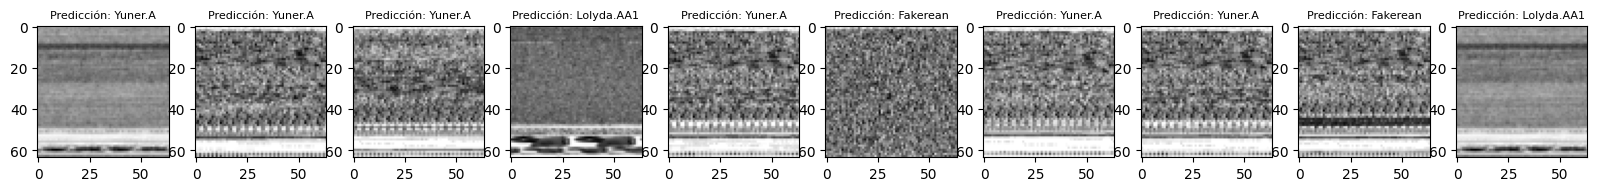

In [ ]:
_, dig = plt.subplots(nrows=1, ncols=10, figsize=(20, 6))

XF = X[455:]
VP = clasi.predict(XF)

listap = []

for d, imagen, prediccion in zip(dig, X, VP):
    imagen = imagen.reshape(64, 64)
    listap.append(prediccion)
    # Enseñamos la imagen en tonos grises
    d.imshow(imagen, cmap = plt.cm.gray_r)
    d.set_title(f"Predicción: {prediccion}", fontsize=8)

Vamos a comprobar si las predicciones son correctas:

In [ ]:
valores_reales = y[455:]

# Calculamos el error comparando las predicciones con los valores reales
er = 1 - accuracy_score(valores_reales, listap)

print('El error de este modelo es de: %6.4f' % er)

El error de este modelo es de: 0.0000


Ha clasificado las imágenes correctamente con un error del 0%.